In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import pandas as pd
from google.colab import files

# ใช้คำสั่ง files.upload() เพื่ออัปโหลดไฟล์
uploaded = files.upload()

# หลังจากอัปโหลดไฟล์เสร็จสิ้น ให้ใช้ชื่อไฟล์ที่ต้องการโหลดในการสร้าง DataFrame
for filename in uploaded.keys():
    # โหลดไฟล์ CSV เข้าสู่ DataFrame
    df = pd.read_csv(filename)
    print(f'Uploaded file: {filename}, loaded into DataFrame')



Saving GD1.csv to GD1.csv
Uploaded file: GD1.csv, loaded into DataFrame


In [ ]:
df

,Date,Time,Output_Volumn,RPM,Current,Temp.Motor,Date_Change_Grinding,Count_Grinding,Output/Current,chang_Grinding,chang_Grinding_I
0,2023-02-17 00:00:00,23:40:24,438.969360,209.29829,339.509567,78.000000,2023-01-27 8:02:20,1,1.292951,0,0
1,2023-02-18 00:00:00,23:40:24,437.152008,259.05379,259.053789,74.500000,2023-01-27 8:02:20,2,1.687495,0,0
2,2023-02-19 00:00:00,23:40:24,459.638092,292.65894,292.658941,71.000000,2023-01-27 8:02:20,3,1.570559,0,0
3,2023-02-20 00:00:00,23:40:24,386.098511,217.55669,217.556687,69.333333,2023-01-27 8:02:20,4,1.774703,0,0
4,2023-02-21 00:00:00,23:40:24,503.905029,303.60207,303.602067,65.000000,2023-01-27 8:02:20,5,1.659755,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2024-03-18 00:00:00,23:40:24,395.706238,342.77518,342.775179,82.666667,2024-02-15 12:21:08,64,1.154419,0,0
396,2024-03-19 00:00:00,23:40:24,396.438812,239.26771,239.267714,87.000000,2024-02-15 12:21:08,65,1.656884,0,0
397,2024-03-20 00:00:00,23:40:24,427.867584,250.36004,250.360044,79.333333,2024-02-15 12:21:08,66,1.709009,0,0
398,2024-03-21 00:00:00,23:40:24,443.448792,342.39487,342.394874,79.750000,2024-02-15 12:21:08,67,1.295139,0,0


In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.drop('Time',axis=1,inplace=True)

In [ ]:
df.drop('Date_Change_Grinding',axis=1,inplace=True)

In [ ]:
df.drop('Count_Grinding',axis=1,inplace=True)

In [ ]:
df.drop('chang_Grinding',axis=1,inplace=True)

In [ ]:
df.drop('Output/Current',axis=1,inplace=True)

In [ ]:
df

,Output_Volumn,RPM,Current,Temp.Motor,Output/Current,chang_Grinding_I
0,438.969360,209.29829,339.509567,78.000000,1.292951,0
1,437.152008,259.05379,259.053789,74.500000,1.687495,0
2,459.638092,292.65894,292.658941,71.000000,1.570559,0
3,386.098511,217.55669,217.556687,69.333333,1.774703,0
4,503.905029,303.60207,303.602067,65.000000,1.659755,0
...,...,...,...,...,...,...
395,395.706238,342.77518,342.775179,82.666667,1.154419,0
396,396.438812,239.26771,239.267714,87.000000,1.656884,0
397,427.867584,250.36004,250.360044,79.333333,1.709009,0
398,443.448792,342.39487,342.394874,79.750000,1.295139,0


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# สร้างโมเดล SMOTE และ RandomUnderSampler
over_sampler = SMOTE(sampling_strategy=0.5)  # สุ่มตัวอย่างเพิ่มให้มีความสมดุลกับคลาสมากขึ้นเป็น 0.5
under_sampler = RandomUnderSampler(sampling_strategy=0.8)  # ลบตัวอย่างให้มีความสมดุลกับคลาสมากขึ้นเป็น 0.8

# สร้างท่อสำหรับการประมวลผลแบบลำดับ
pipeline = Pipeline([
    ('over', over_sampler),
    ('under', under_sampler)
])

# นำข้อมูลผ่านท่อการประมวลผล
X_resampled, y_resampled = pipeline.fit_resample(X, y)


NameError: name 'X' is not defined

In [ ]:
X = df.drop('chang_Grinding_I', axis=1)  # เลือกคอลัมน์ที่จะนำมาใช้ในการทำนาย
y = df['chang_Grinding_I']  # เลือกคอลัมน์ที่เป็นเป้าหมาย

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


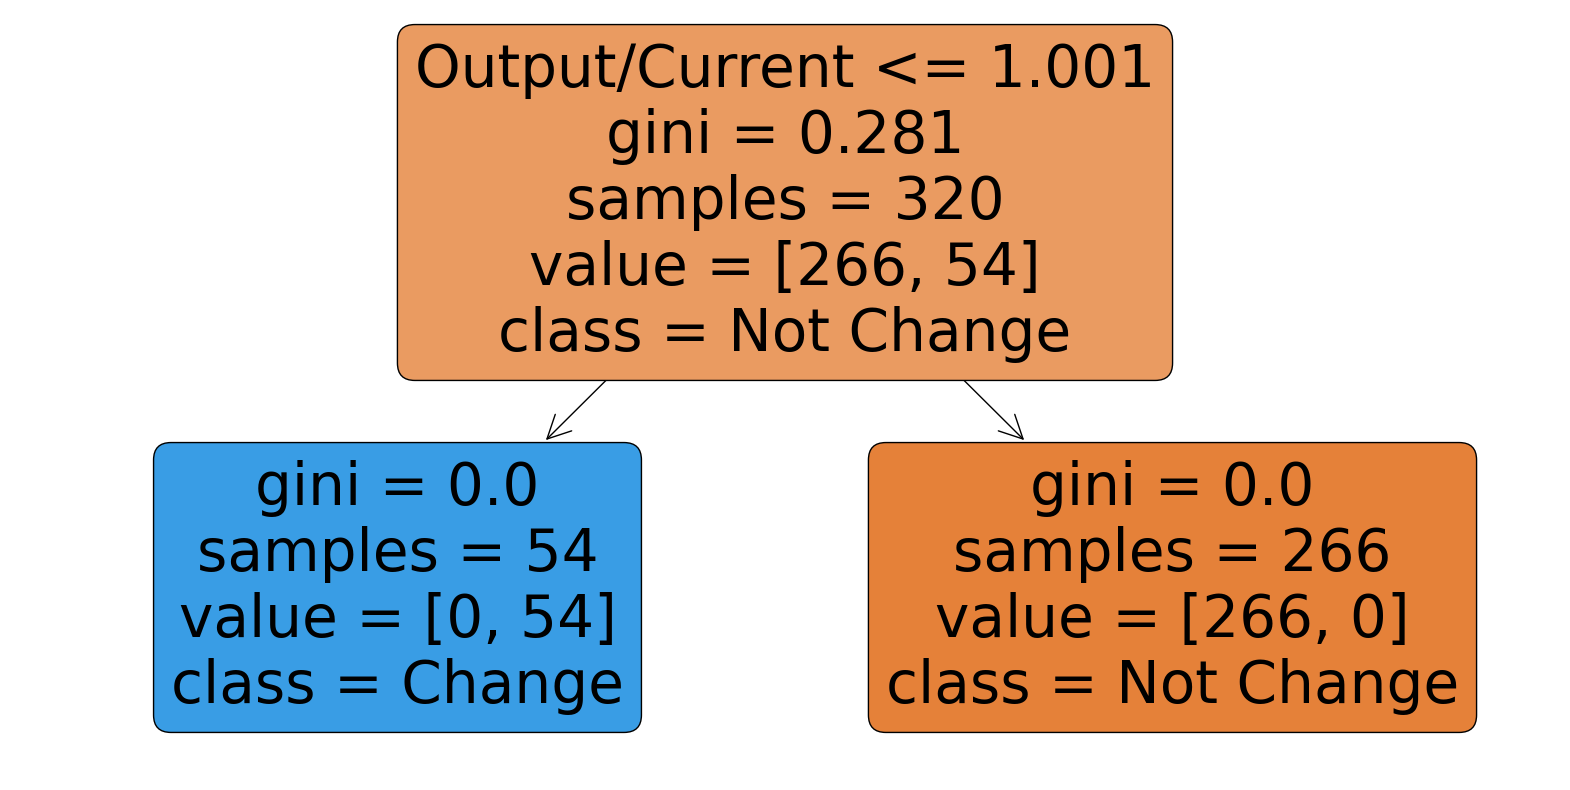

In [ ]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Not Change', 'Change'], rounded=True)
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[69  0]
 [ 0 11]]


In [ ]:
from sklearn.metrics import confusion_matrix

# คำนวณค่า Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# พิมพ์ Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[69  0]
 [ 0 11]]


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Confusion Matrix:")

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

Confusion Matrix:
Accuracy: 1.00
F1 Score: 1.00
Recall: 1.00
Precision: 1.00
